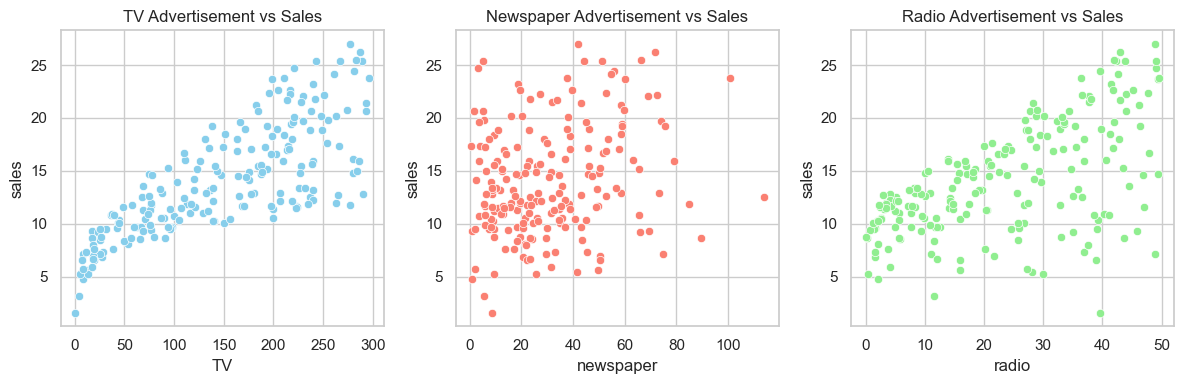

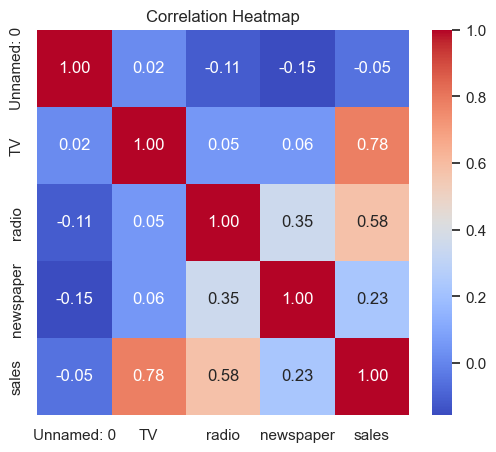

Training Set Metrics:
R-squared: 0.8850071142546371
MAE: 1.3749370490107342
MSE: 3.2030691013148522
RMSE: 1.789712016307331

Test Set Metrics:
R-squared: 0.9225191550357023
MAE: 1.0543666890342978
MSE: 1.9274675206987768
RMSE: 1.38833264050759


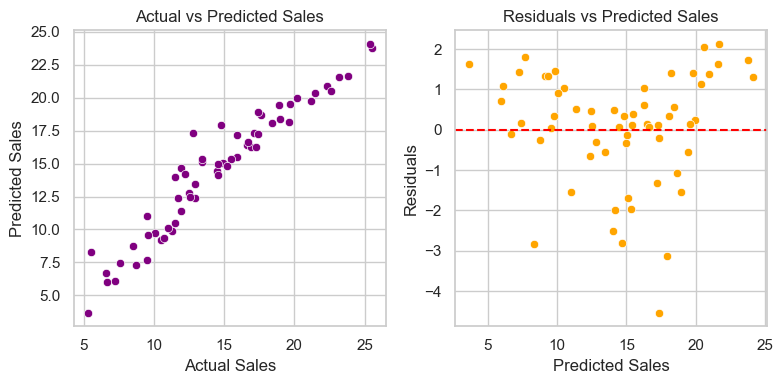

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     259.7
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           2.39e-62
Time:                        18:41:49   Log-Likelihood:                -280.14
No. Observations:                 140   AIC:                             570.3
Df Residuals:                     135   BIC:                             585.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0057      0.154     90.784      0.0

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

# Load the advertising data
advertising_data = pd.read_csv('F:/IIT 1st Semester/Assignment/ML/3/Advertising.csv')

# Visualize relationships between advertising mediums and sales
sns.set(style='whitegrid')
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.scatterplot(data=advertising_data, x='TV', y='sales', color='skyblue')
plt.title('TV Advertisement vs Sales')

plt.subplot(132)
sns.scatterplot(data=advertising_data, x='newspaper', y='sales', color='salmon')
plt.title('Newspaper Advertisement vs Sales')

plt.subplot(133)
sns.scatterplot(data=advertising_data, x='radio', y='sales', color='lightgreen')
plt.title('Radio Advertisement vs Sales')

plt.tight_layout()
plt.show()

# Heatmap to visualize correlations
plt.figure(figsize=(6, 5))
sns.heatmap(advertising_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Preprocess the data
X = advertising_data.drop('sales', axis=1)
y = advertising_data['sales']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluation Metrics
train_predictions = linear_model.predict(X_train)
test_predictions = linear_model.predict(X_test)

print('Training Set Metrics:')
print('R-squared:', r2_score(y_train, train_predictions))
print('MAE:', mean_absolute_error(y_train, train_predictions))
print('MSE:', mean_squared_error(y_train, train_predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_train, train_predictions)))
print('\nTest Set Metrics:')
print('R-squared:', r2_score(y_test, test_predictions))
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, test_predictions)))

# Residuals and Predicted vs Actual
results = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': test_predictions, 'Residuals': y_test - test_predictions})

plt.figure(figsize=(8, 4))
plt.subplot(121)
sns.scatterplot(x='Actual Sales', y='Predicted Sales', data=results, color='purple')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

plt.subplot(122)
sns.scatterplot(x='Predicted Sales', y='Residuals', data=results, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Sales')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Parameter Significance Test
X_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_constant).fit()
print(model.summary())
